In [1]:
# @title Quickstart for Google Colab
from pathlib import Path
if Path.cwd().name != 'W4':
  !git clone --quiet https://github.com/tavisualcomputing/viscomp2025/
  %cd viscomp2025/Exercises/W4

# Week 4: Fourier transform: filtering and sampling

The exercise of this week is about Fourier Transform, image filtering and sampling. 
Run this notebook on Colab [following this link.](https://colab.research.google.com/github/tavisualcomputing/viscomp2024/blob/main/Exercises/W4/W4_exercise.ipynb)

First load the following libraries that will be necessary.

In [2]:
!pip install scipy
!pip install scikit-image

In [3]:
%matplotlib inline

from time import time
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.ndimage import convolve
from scipy.fftpack import fft2, ifft2, fftshift
from matplotlib.pyplot import imshow, show, figure
import numpy as np

Load the two images wall.jpg and sidewalk.jpg.

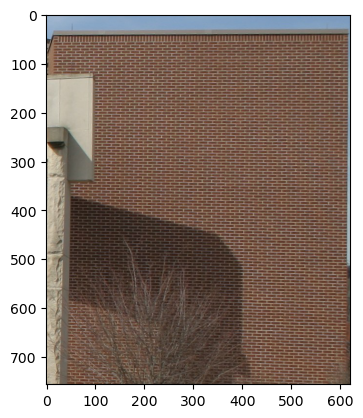

In [4]:
wall = imread('wall.jpg') / 255.
wall_gray = rgb2gray(wall)
imshow(wall)
show()

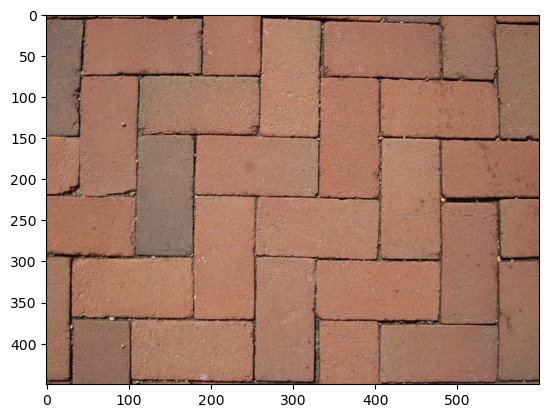

In [5]:
side = imread('sidewalk.jpg') / 255.
side_gray = rgb2gray(side)
imshow(side)
show()

Preliminary question: which of the two images has the most low pass content? Which one has the most high pass content?

Answer: the sidewalk has more low pass content than the wall

The following functions will be useful in the course of this tutorial: `fft2`, `ifft2`, `convolve` from scipy and the following function:

In [6]:
def gaussian_filter(shape, sigma):
    """
    Returns a 2D gaussian filter specified by its shape and standard deviation.
    """
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

## Part A: Filtering

Create three Gaussian filters:
- one 5x5 Gaussian low pass filter with standard deviation 1
- one 15x15 Gaussian high pass filter with standard deviation $\sigma=3.5$. Hint: the high pass content of an image can be extracted by subtracting the low pass filtered image from the original image. Hence, you can get a high pass filter kernel from a low pass one by subtracting the low pass filter kernel from a unit impulse filter. A unit impulse filter is a filter full of 0s with a single 1 in the middle, that once convolved with an image returns the same image.
- one band pass filter. To do this, create first a 15x15 Gaussian filter with standard deviation 1 and then convolve this low pass filter with the previous high pass filter to create the band pass filter. Indeed, convolution is associative: 
$$
I \ast F_\text{band-pass} = (I \ast F_\text{low-pass}) \ast F_\text{high-pass} = I \ast (F_\text{low-pass} \ast F_\text{high-pass})
$$

You can then visualize your filters in spatial and frequency domains (using `fft2` and `fftshift` from scipy for the latter). Since the filters are complex in the frequency domain, use `np.abs()` to display the magnitude of the filter.

In [7]:
# Low pass filter
# Enter your code here
low_pass_filter = gaussian_filter((5, 5), 1.0)

# High pass filter
# Enter your code here
unit_impulse = np.zeros((15, 15))
center = 15 // 2
unit_impulse[center, center] = 1.0
low_pass_component = gaussian_filter((15, 15), 3.5)
high_pass_filter = unit_impulse - low_pass_component

# Band pass filter
# Enter your code here
low_pass_15x15 = gaussian_filter((15, 15), 1.0)
from scipy.signal import convolve2d
band_pass_filter = convolve2d(low_pass_15x15, high_pass_filter, mode='same')
band_pass_filter = band_pass_filter / np.sum(np.abs(band_pass_filter))

Apply these three filters to the two sample grayscale images in spatial domain first by convolving the image with the kernel, and in frequency domain secondly by taking the Fourier tranform of both the image and the filter kernel and multiplying them. Compare the runtimes of spatial and frequency domain filtering, using the `time` function of python. Compare the filtering results of two images by visualizing the filtered images in both spatial and frequency domains. Check that your initial guess about the low/high pass content of the images is correct.

### Filtering in spatial domain

Original image:


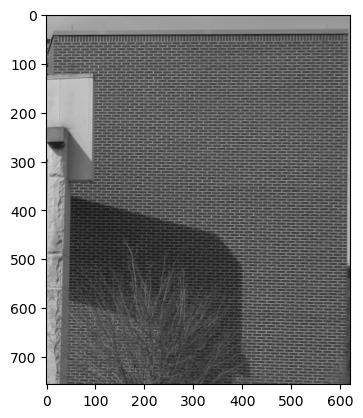

Processing wall image with our three filters...
Frequency content analysis:
Low pass energy: 178430.63
High pass energy: 32455.74
Band pass energy: 13523.18


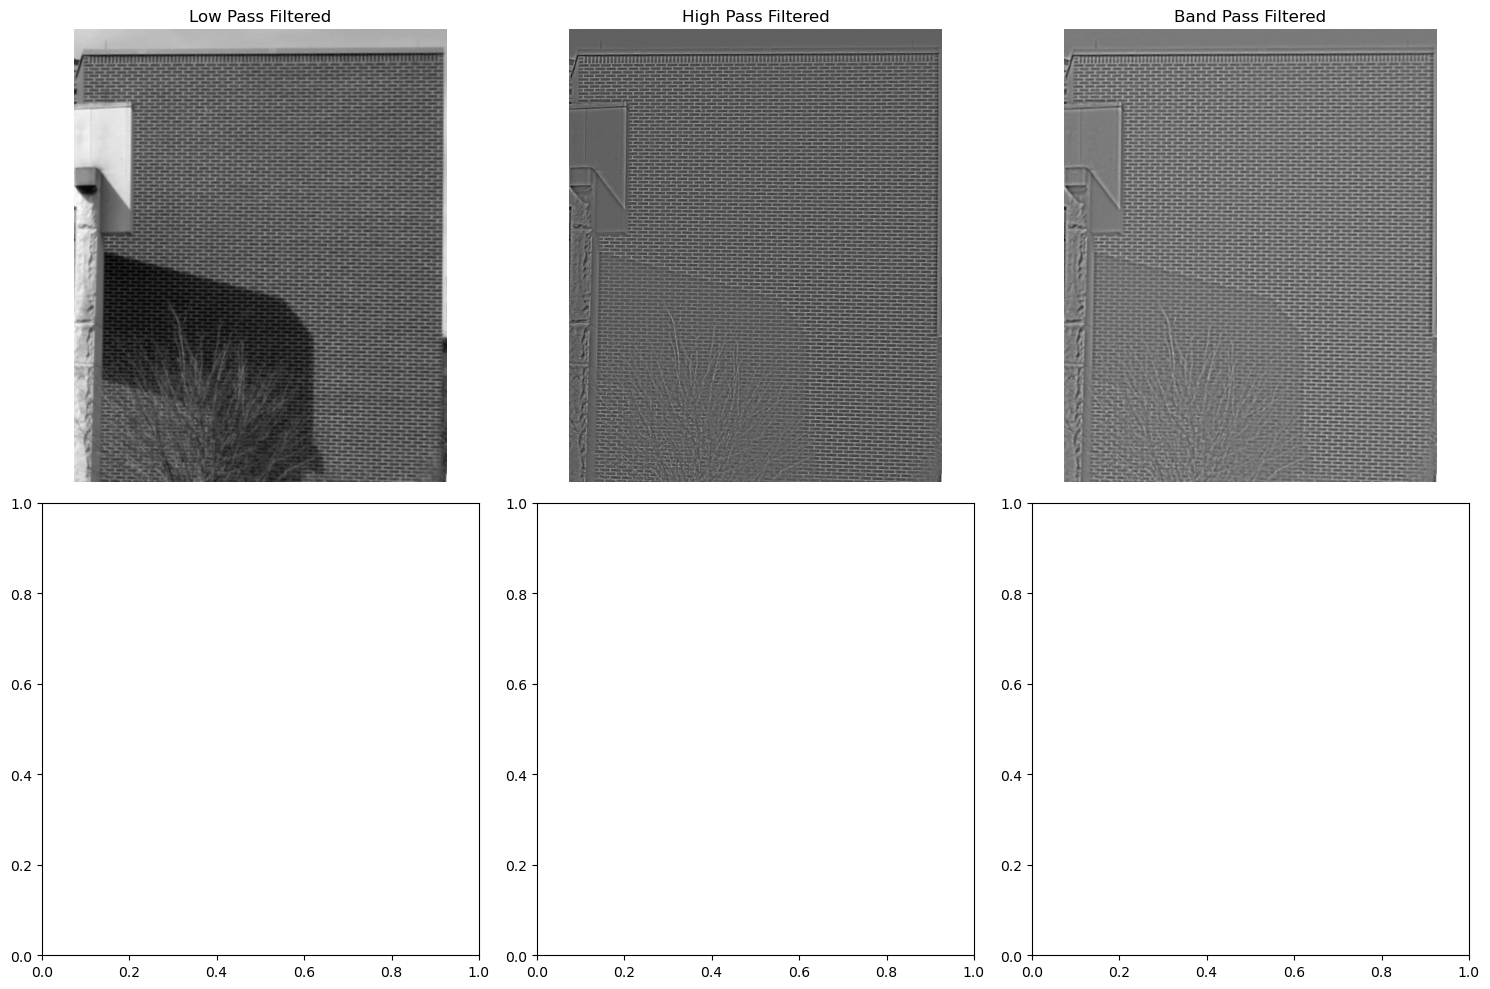

In [12]:
print("Original image:")
imshow(wall_gray, cmap='gray')
show()

# Enter your code here
# Apply the three filters to wall_gray image
print("Processing wall image with our three filters...")

# Spatial domain filtering
wall_low_spatial = convolve2d(wall_gray, low_pass_filter, mode='same', boundary='symm')
wall_high_spatial = convolve2d(wall_gray, high_pass_filter, mode='same', boundary='symm')
wall_band_spatial = convolve2d(wall_gray, band_pass_filter, mode='same', boundary='symm')

# Display filtered results
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(wall_low_spatial, cmap='gray')
axes[0, 0].set_title('Low Pass Filtered')
axes[0, 0].axis('off')

axes[0, 1].imshow(wall_high_spatial, cmap='gray')
axes[0, 1].set_title('High Pass Filtered')
axes[0, 1].axis('off')

axes[0, 2].imshow(wall_band_spatial, cmap='gray')
axes[0, 2].set_title('Band Pass Filtered')
axes[0, 2].axis('off')

# Analyze frequency content
print("Frequency content analysis:")
print(f"Low pass energy: {np.sum(np.abs(wall_low_spatial)):.2f}")
print(f"High pass energy: {np.sum(np.abs(wall_high_spatial)):.2f}")
print(f"Band pass energy: {np.sum(np.abs(wall_band_spatial)):.2f}")

plt.tight_layout()
plt.show()

Original image:


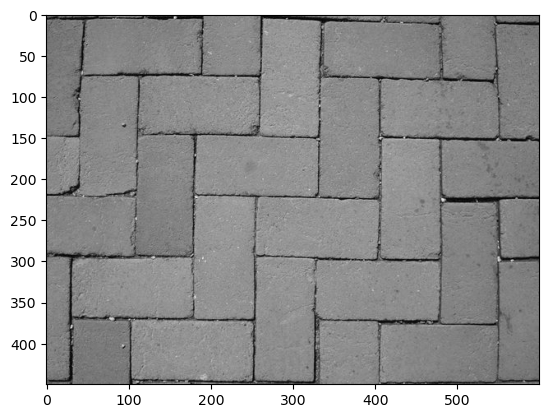

Processing side image with our three filters...
Frequency content analysis:
Low pass energy: 131568.62
High pass energy: 9504.22
Band pass energy: 5197.26


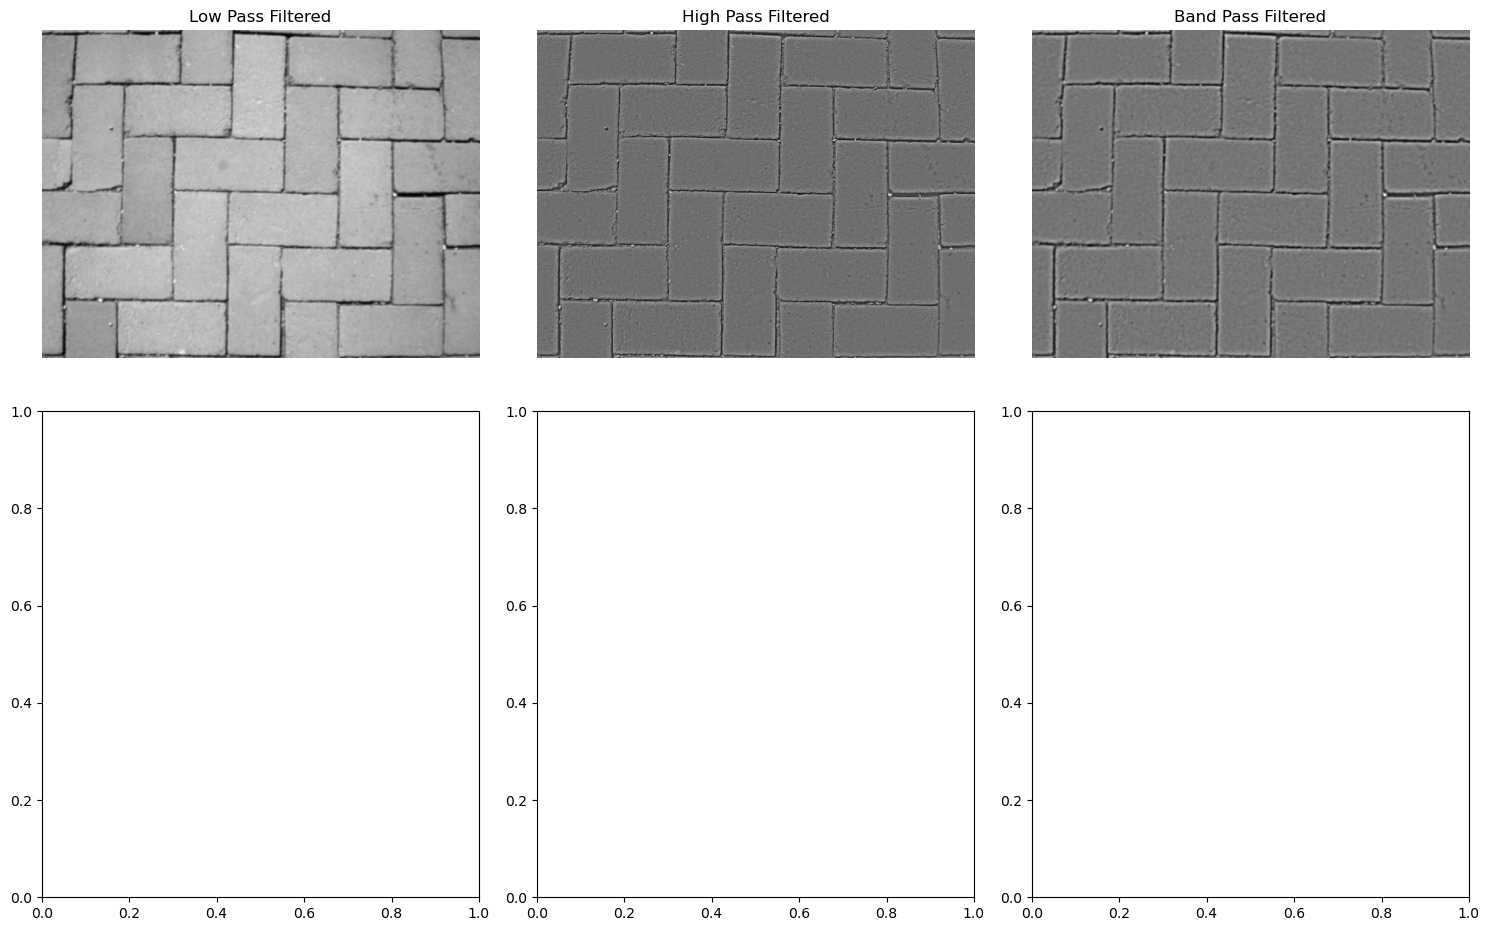

In [13]:
print("Original image:")
imshow(side_gray, cmap='gray')
show()

# Enter your code here
# Apply the three filters to side_gray image
print("Processing side image with our three filters...")

# Spatial domain filtering
side_low_spatial = convolve2d(side_gray, low_pass_filter, mode='same', boundary='symm')
side_high_spatial = convolve2d(side_gray, high_pass_filter, mode='same', boundary='symm')
side_band_spatial = convolve2d(side_gray, band_pass_filter, mode='same', boundary='symm')

# Display filtered results
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(side_low_spatial, cmap='gray')
axes[0, 0].set_title('Low Pass Filtered')
axes[0, 0].axis('off')

axes[0, 1].imshow(side_high_spatial, cmap='gray')
axes[0, 1].set_title('High Pass Filtered')
axes[0, 1].axis('off')

axes[0, 2].imshow(side_band_spatial, cmap='gray')
axes[0, 2].set_title('Band Pass Filtered')
axes[0, 2].axis('off')

# Analyze frequency content
print("Frequency content analysis:")
print(f"Low pass energy: {np.sum(np.abs(side_low_spatial)):.2f}")
print(f"High pass energy: {np.sum(np.abs(side_high_spatial)):.2f}")
print(f"Band pass energy: {np.sum(np.abs(side_band_spatial)):.2f}")

plt.tight_layout()
plt.show()

### Filtering in frequency domain

Note: the output of `ifft2` is a numpy array with complex values with zero imaginary part (up to numerical precision). Extract the real component via the `.real` attribute.

Original image:


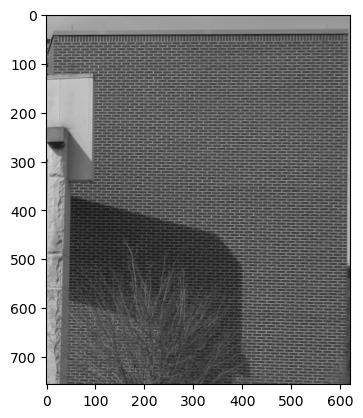

Processing wall image in frequency domain...
Frequency domain filtering analysis:
Low pass energy: 178430.63
High pass energy: 33043.61
Band pass energy: 13781.86


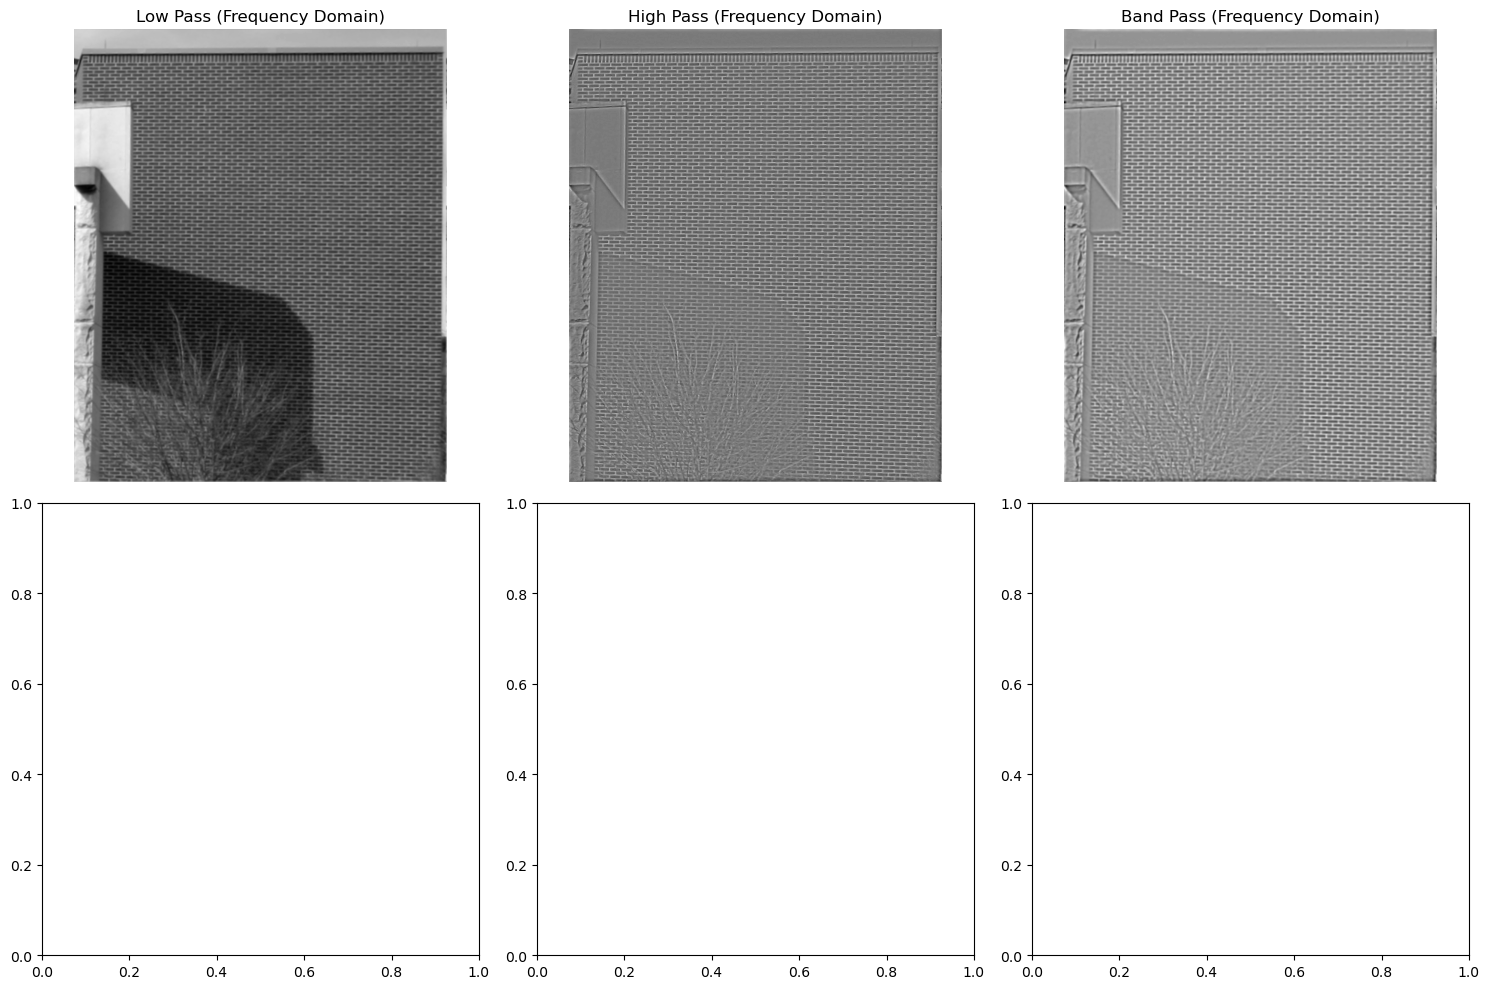

In [14]:
print("Original image:")
imshow(wall_gray, cmap='gray')
show()

# Enter your code here
# Filtering in frequency domain for wall_gray image
print("Processing wall image in frequency domain...")

def frequency_filtering(image, kernel):
    """Apply filter in frequency domain using FFT"""
    # Pad kernel to match image size
    kernel_padded = np.zeros_like(image)
    k_h, k_w = kernel.shape
    i_h, i_w = image.shape
    
    start_h = (i_h - k_h) // 2
    start_w = (i_w - k_w) // 2
    kernel_padded[start_h:start_h+k_h, start_w:start_w+k_w] = kernel
    
    # Apply FFT to both image and kernel
    image_fft = fft2(image)
    kernel_fft = fft2(fftshift(kernel_padded))  # Shift kernel to center
    
    # Multiply in frequency domain and inverse transform
    filtered_fft = image_fft * kernel_fft
    filtered_image = np.real(ifft2(filtered_fft))
    
    return filtered_image

# Apply frequency domain filtering
wall_low_freq = frequency_filtering(wall_gray, low_pass_filter)
wall_high_freq = frequency_filtering(wall_gray, high_pass_filter)
wall_band_freq = frequency_filtering(wall_gray, band_pass_filter)

# Display frequency domain filtered results
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(wall_low_freq, cmap='gray')
axes[0, 0].set_title('Low Pass (Frequency Domain)')
axes[0, 0].axis('off')

axes[0, 1].imshow(wall_high_freq, cmap='gray')
axes[0, 1].set_title('High Pass (Frequency Domain)')
axes[0, 1].axis('off')

axes[0, 2].imshow(wall_band_freq, cmap='gray')
axes[0, 2].set_title('Band Pass (Frequency Domain)')
axes[0, 2].axis('off')

# Analyze frequency content
print("Frequency domain filtering analysis:")
print(f"Low pass energy: {np.sum(np.abs(wall_low_freq)):.2f}")
print(f"High pass energy: {np.sum(np.abs(wall_high_freq)):.2f}")
print(f"Band pass energy: {np.sum(np.abs(wall_band_freq)):.2f}")

plt.tight_layout()
plt.show()

Original image:


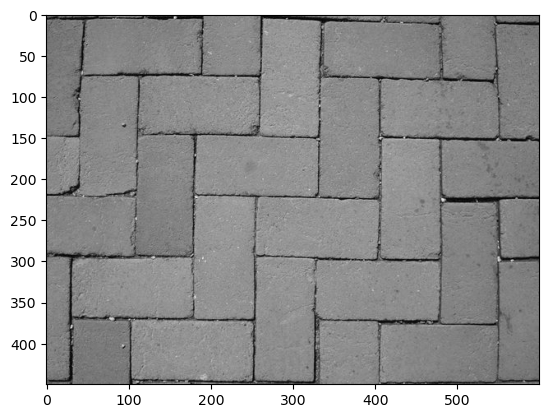

Processing side image in frequency domain...
Frequency domain filtering analysis:
Low pass energy: 131568.62
High pass energy: 9569.95
Band pass energy: 5228.60


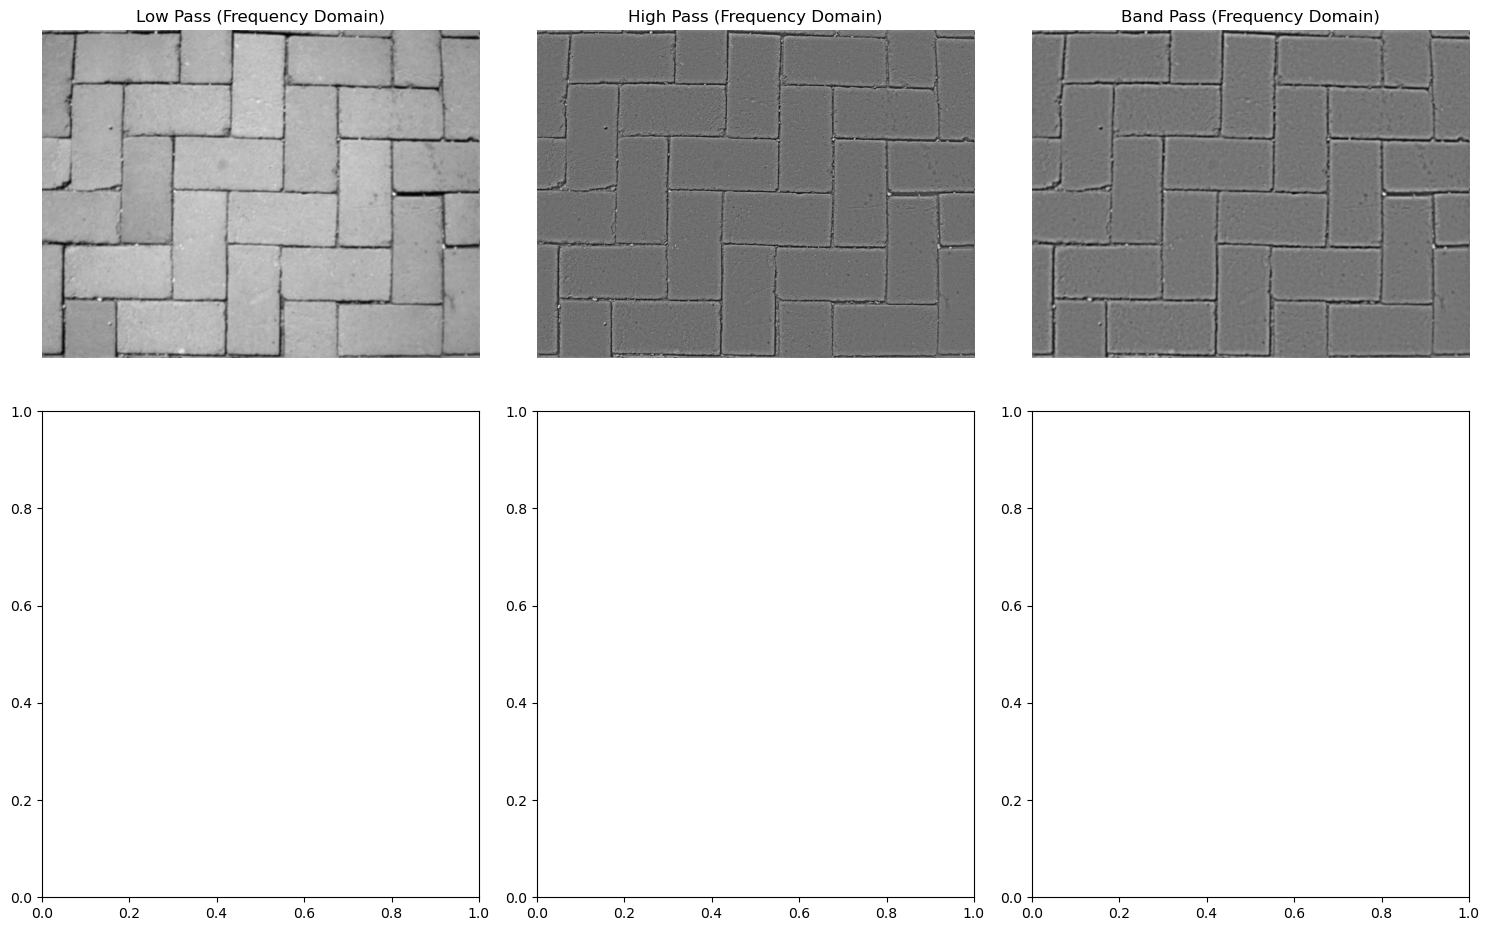

In [15]:
print("Original image:")
imshow(side_gray, cmap='gray')
show()

# Enter your code here
# Filtering in frequency domain for side_gray image
print("Processing side image in frequency domain...")

# Apply frequency domain filtering
side_low_freq = frequency_filtering(side_gray, low_pass_filter)
side_high_freq = frequency_filtering(side_gray, high_pass_filter)
side_band_freq = frequency_filtering(side_gray, band_pass_filter)

# Display frequency domain filtered results
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(side_low_freq, cmap='gray')
axes[0, 0].set_title('Low Pass (Frequency Domain)')
axes[0, 0].axis('off')

axes[0, 1].imshow(side_high_freq, cmap='gray')
axes[0, 1].set_title('High Pass (Frequency Domain)')
axes[0, 1].axis('off')

axes[0, 2].imshow(side_band_freq, cmap='gray')
axes[0, 2].set_title('Band Pass (Frequency Domain)')
axes[0, 2].axis('off')

# Analyze frequency content
print("Frequency domain filtering analysis:")
print(f"Low pass energy: {np.sum(np.abs(side_low_freq)):.2f}")
print(f"High pass energy: {np.sum(np.abs(side_high_freq)):.2f}")
print(f"Band pass energy: {np.sum(np.abs(side_band_freq)):.2f}")

plt.tight_layout()
plt.show()

## Part B: Sampling

Downsample both images to one fourth of the resolution by taking every second row and column. You can use numpy array slicing for this: `my_array[start:end:step]`. Compare the results in terms of distortions and unexpected effects. Explain why the quality of the two downsampled images differ. 

Downsampling images to 1/4 resolution...
Original wall image shape: (756, 622)
Downsampled wall image shape: (378, 311)
Original side image shape: (450, 600)
Downsampled side image shape: (225, 300)


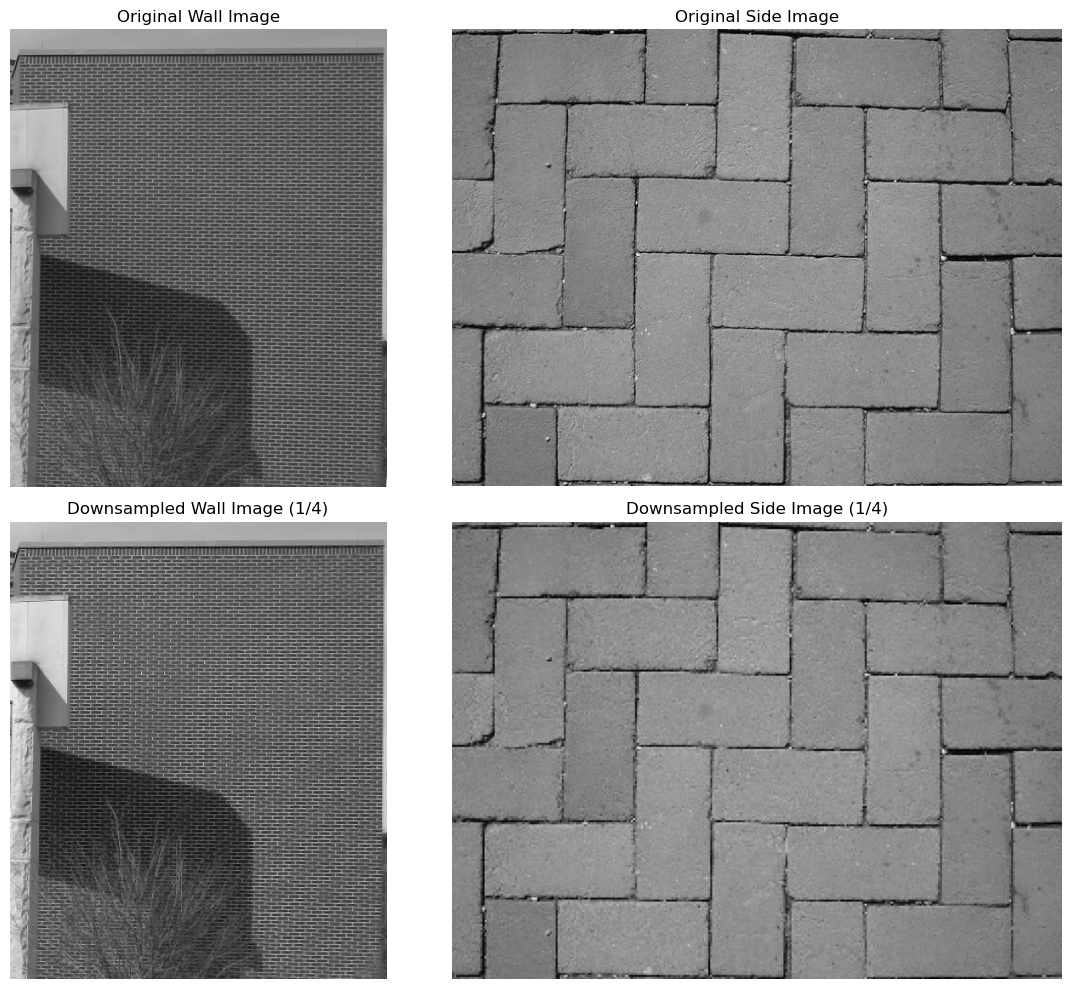

In [18]:

print("Downsampling images to 1/4 resolution...")

# Downsample by taking every second row and column
wall_downsampled = wall_gray[::2, ::2]
side_downsampled = side_gray[::2, ::2]

print(f"Original wall image shape: {wall_gray.shape}")
print(f"Downsampled wall image shape: {wall_downsampled.shape}")
print(f"Original side image shape: {side_gray.shape}")
print(f"Downsampled side image shape: {side_downsampled.shape}")

# Display the downsampled images
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original images
axes[0, 0].imshow(wall_gray, cmap='gray')
axes[0, 0].set_title('Original Wall Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(side_gray, cmap='gray')
axes[0, 1].set_title('Original Side Image')
axes[0, 1].axis('off')

# Downsampled images
axes[1, 0].imshow(wall_downsampled, cmap='gray')
axes[1, 0].set_title('Downsampled Wall Image (1/4)')
axes[1, 0].axis('off')

axes[1, 1].imshow(side_downsampled, cmap='gray')
axes[1, 1].set_title('Downsampled Side Image (1/4)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


Create three 15x15 Gaussian low pass filters with standard deviations 0.5, 1 and 1.5 and apply them to the color image wall.jpg. You can filter the three channels separately and gather them in an RGB image with the numpy function `np.stack([r_img, g_img, b_img], axis=-1)`. Downsample the three filtered images to one fourth resolution. Compare the resulting downsampled images in terms of quality.

Creating Gaussian low pass filters...
Filter shapes: (15, 15), (15, 15), (15, 15)
Filter std deviations: 0.5, 1.0, 1.5

Using grayscale wall image...
Image shape: (756, 622)
Image range: 0.014472156862745097 to 0.9988690196078431

Applying filters and checking results...
Difference between σ=0.5 and σ=1.0: 0.023400
Difference between σ=1.0 and σ=1.5: 0.017325

Downsampling filtered images...
Downsampled image shapes: (378, 311)


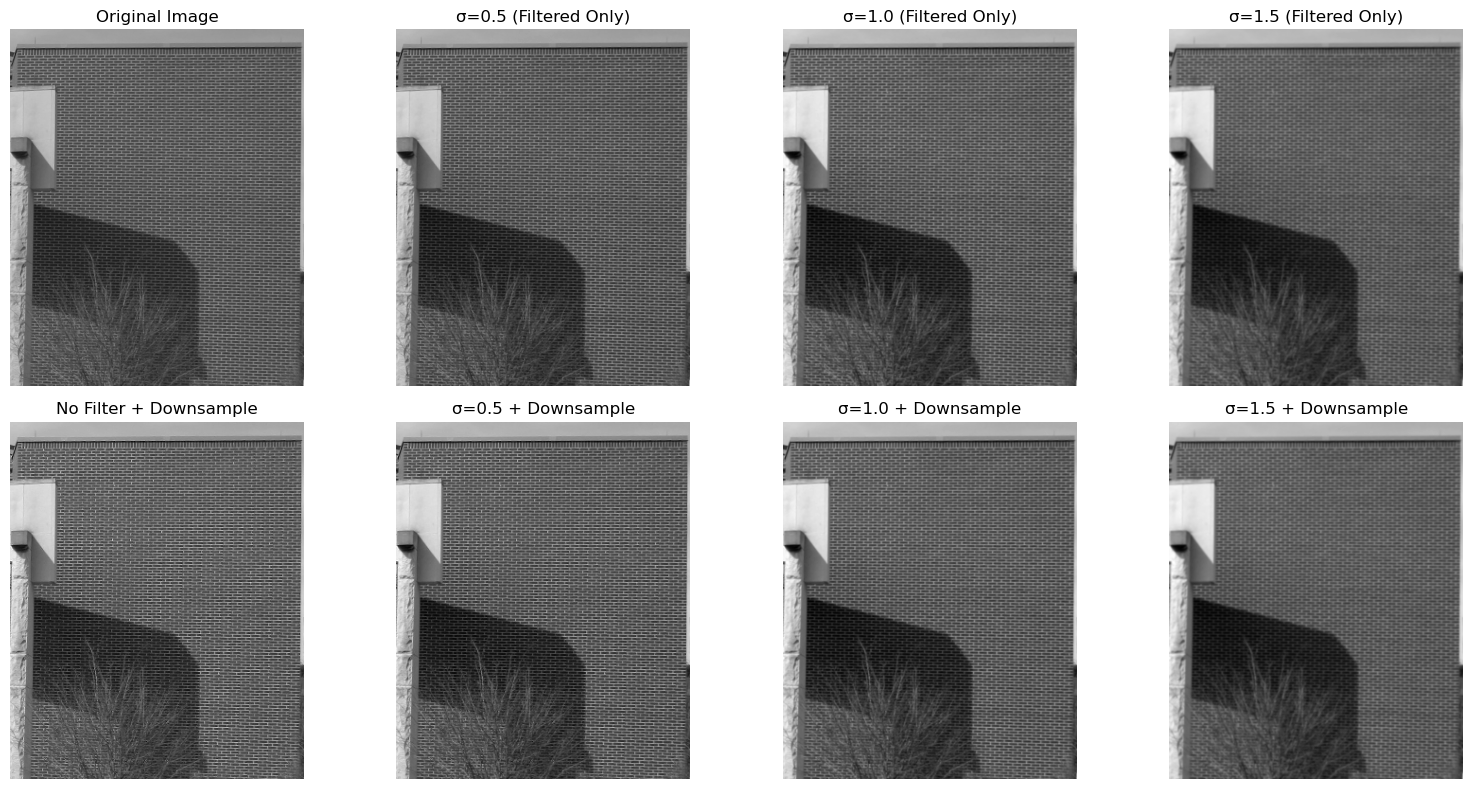


Debugging - showing small 10x10 patches from each filtered image:


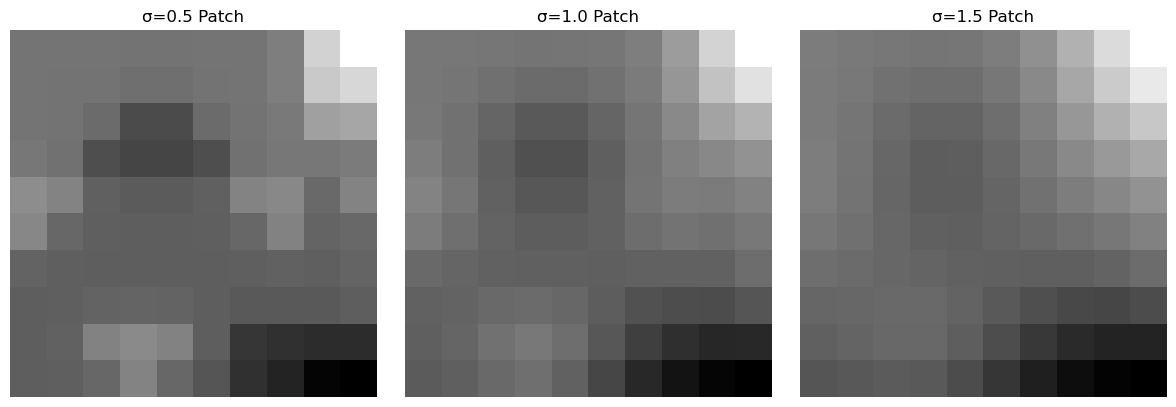

Patch value ranges:
σ=0.5: 0.691 to 0.711
σ=1.0: 0.692 to 0.709
σ=1.5: 0.693 to 0.707


In [23]:
# Create the filters
print("Creating Gaussian low pass filters...")

# Create three 15x15 Gaussian low pass filters with different standard deviations
gaussian_05 = gaussian_filter((15, 15), 0.5)
gaussian_10 = gaussian_filter((15, 15), 1.0)
gaussian_15 = gaussian_filter((15, 15), 1.5)

print(f"Filter shapes: {gaussian_05.shape}, {gaussian_10.shape}, {gaussian_15.shape}")
print(f"Filter std deviations: 0.5, 1.0, 1.5")

# Use the grayscale wall image we know works
print("\nUsing grayscale wall image...")
image_to_use = wall_gray
print("Image shape:", image_to_use.shape)
print("Image range:", image_to_use.min(), "to", image_to_use.max())

# Apply filters and verify they're actually different
print("\nApplying filters and checking results...")

filtered_05 = convolve2d(image_to_use, gaussian_05, mode='same', boundary='symm')
filtered_10 = convolve2d(image_to_use, gaussian_10, mode='same', boundary='symm')
filtered_15 = convolve2d(image_to_use, gaussian_15, mode='same', boundary='symm')

# Check if filters actually produced different results
diff_05_10 = np.mean(np.abs(filtered_05 - filtered_10))
diff_10_15 = np.mean(np.abs(filtered_10 - filtered_15))
print(f"Difference between σ=0.5 and σ=1.0: {diff_05_10:.6f}")
print(f"Difference between σ=1.0 and σ=1.5: {diff_10_15:.6f}")

# Downsample the resulting images
print("\nDownsampling filtered images...")

down_05 = filtered_05[::2, ::2]
down_10 = filtered_10[::2, ::2]
down_15 = filtered_15[::2, ::2]
down_original = image_to_use[::2, ::2]

print("Downsampled image shapes:", down_05.shape)

# Display the results with proper normalization
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Function to safely display images
def safe_imshow(ax, img, title, cmap='gray'):
    """Display image with proper normalization and error handling"""
    if img is None or img.size == 0:
        ax.text(0.5, 0.5, 'No Image', transform=ax.transAxes, ha='center')
        ax.set_title(f'{title} (Missing)')
    else:
        # Ensure proper data range for display
        display_img = img.astype(np.float64)
        if display_img.max() > display_img.min():
            display_img = (display_img - display_img.min()) / (display_img.max() - display_img.min())
        ax.imshow(display_img, cmap=cmap)
        ax.set_title(title)
    ax.axis('off')

# Original image
safe_imshow(axes[0, 0], image_to_use, 'Original Image')

# Filtered but not downsampled
safe_imshow(axes[0, 1], filtered_05, 'σ=0.5 (Filtered Only)')
safe_imshow(axes[0, 2], filtered_10, 'σ=1.0 (Filtered Only)')
safe_imshow(axes[0, 3], filtered_15, 'σ=1.5 (Filtered Only)')

# Downsampled images
safe_imshow(axes[1, 0], down_original, 'No Filter + Downsample')
safe_imshow(axes[1, 1], down_05, 'σ=0.5 + Downsample')
safe_imshow(axes[1, 2], down_10, 'σ=1.0 + Downsample')
safe_imshow(axes[1, 3], down_15, 'σ=1.5 + Downsample')

plt.tight_layout()
plt.show()

# Additional debugging - show small patches to see differences
print("\nDebugging - showing small 10x10 patches from each filtered image:")
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

patch_size = 10
patch_05 = filtered_05[:patch_size, :patch_size]
patch_10 = filtered_10[:patch_size, :patch_size]
patch_15 = filtered_15[:patch_size, :patch_size]

axes[0].imshow(patch_05, cmap='gray')
axes[0].set_title('σ=0.5 Patch')
axes[0].axis('off')

axes[1].imshow(patch_10, cmap='gray')
axes[1].set_title('σ=1.0 Patch')
axes[1].axis('off')

axes[2].imshow(patch_15, cmap='gray')
axes[2].set_title('σ=1.5 Patch')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("Patch value ranges:")
print(f"σ=0.5: {patch_05.min():.3f} to {patch_05.max():.3f}")
print(f"σ=1.0: {patch_10.min():.3f} to {patch_10.max():.3f}")
print(f"σ=1.5: {patch_15.min():.3f} to {patch_15.max():.3f}")




## Bonus: for those that finished earlier

Load the blurred road signs image and using your fresh knowledge about filters, design the perfect filter to make the text readable.

In [ ]:
blurred_road_signs = imread('blurred_road_signs.jpg', as_gray=True) / 255.

figure(figsize=(10, 10))
imshow(blurred_road_signs, cmap='gray')
show()

# Exam questions

![alt](exam_questions/Q_B1.png)
![alt](exam_questions/Q_B2_1.png)
![alt](exam_questions/Q_B2_2.png)
![alt](exam_questions/Q_C1.png)
![alt](exam_questions/Q_C2.png)
![alt](exam_questions/Q_C3.png)